<div class="alert alert-block alert-info" style="margin-top: 20px">
    
__Author : Ms.MRUNALINI K.__ (Statistics / Data Science / ML Trainer) , Mumbai

<div class="alert alert-block alert-info" style="margin-top: 20px">

#### ASSIGNMENT : Decision Tree Learning for Playing Ball Game

The following table gives a data set for deciding whether to play or cancel a ball game, depending on the weather conditions.
                            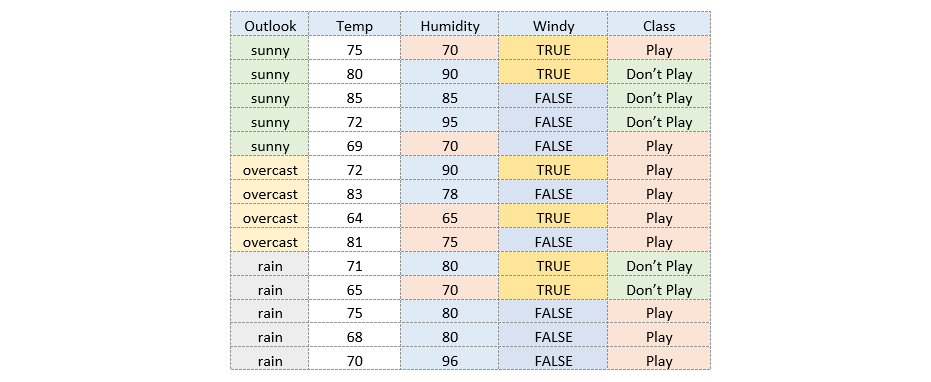


<div class="alert alert-block alert-info" style="margin-top: 20px">

(a) At the root node for a decision tree in this domain, what are the information gains associated with the Outlook and Humidity attributes? (Use a threshold of 75 for humidity (i.e., assume a binary split: humidity ≤ 75 / humidity > 75). Be sure to show your computations.

(b) Again at the root node, what are the gain ratios associated with the Outlook and Humidity attributes (using the same threshold as in (a))? Be sure to show your computations.

(c) Draw the complete (unpruned) decision tree, showing the information gain at each non-leaf 

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
import graphviz

In [2]:
data = np.genfromtxt('weather_data.csv', delimiter=',', dtype=None, encoding=None, skip_header=1)
data

array([('sunny', 75, 70,  True, 'Play'),
       ('sunny', 80, 90,  True, 'Don’t Play'),
       ('sunny', 85, 85, False, 'Don’t Play'),
       ('sunny', 72, 95, False, 'Don’t Play'),
       ('sunny', 69, 70, False, 'Play'),
       ('overcast', 72, 90,  True, 'Play'),
       ('overcast', 83, 78, False, 'Play'),
       ('overcast', 64, 65,  True, 'Play'),
       ('overcast', 81, 75, False, 'Play'),
       ('rain', 71, 80,  True, 'Don’t Play'),
       ('rain', 65, 70,  True, 'Don’t Play'),
       ('rain', 75, 80, False, 'Play'), ('rain', 68, 80, False, 'Play'),
       ('rain', 70, 96, False, 'Play')],
      dtype=[('f0', '<U8'), ('f1', '<i4'), ('f2', '<i4'), ('f3', '?'), ('f4', '<U10')])

In [3]:
# Define the dataset
weather_data = {
    'Outlook':     ['sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'overcast', 'overcast', 
                     'overcast', 'overcast', 'rain', 'rain', 'rain', 'rain', 'rain'],
    
    'Temp(F)':     [75, 80, 85, 72, 69, 72, 83, 64, 81, 71, 65, 75, 68, 70],
    
    'Humidity(%)': [70, 90, 85, 95, 70, 90, 78, 65, 75, 80, 70, 80, 80, 96],
    
    'Windy?':      [True, True, False, False, False, True, False, True, False, True, True, False, False, False],
    
    'Class':       ['Play', "Don't Play", "Don't Play", "Don't Play", 'Play', 'Play', 'Play', 
                    'Play', 'Play', "Don't Play", "Don't Play", 'Play', 'Play', 'Play']
}
data = pd.DataFrame(weather_data)
data

,Outlook,Temp(F),Humidity(%),Windy?,Class
0,sunny,75,70,True,Play
1,sunny,80,90,True,Don't Play
2,sunny,85,85,False,Don't Play
3,sunny,72,95,False,Don't Play
4,sunny,69,70,False,Play
5,overcast,72,90,True,Play
6,overcast,83,78,False,Play
7,overcast,64,65,True,Play
8,overcast,81,75,False,Play
9,rain,71,80,True,Don't Play


In [4]:
print(data.columns)

Index(['Outlook', 'Temp(F)', 'Humidity(%)', 'Windy?', 'Class'], dtype='object')


To print the unique values in the ‘Class’ column to check this:

In [5]:
print(data['Class'].unique())

['Play' "Don't Play"]


To print the unique values in the ‘Outlook’ column to check this:

In [6]:
print(data['Outlook'].unique())

['sunny' 'overcast' 'rain']


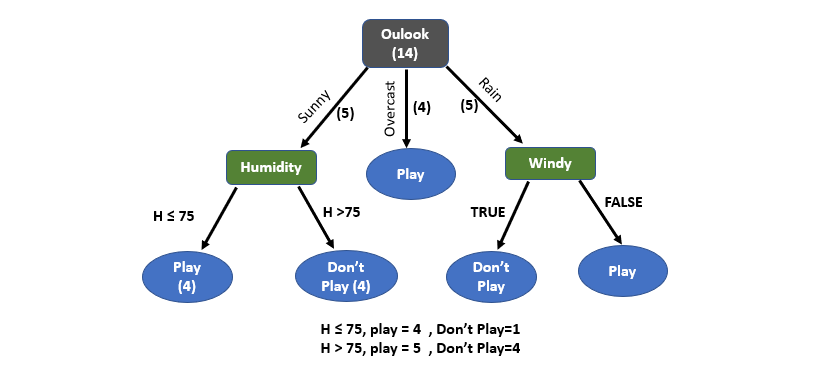

------------------------------------

<div class="alert alert-block alert-info" style="margin-top: 20px">

__(a)__ At the root node for a decision tree in this domain, what are the information gains associated with the Outlook and Humidity attributes? (Use a threshold of 75 for humidity (i.e., assume a binary split: humidity ≤ 75 / humidity > 75). Be sure to show your computations.



__Solution (a):__

__Information Gain__

To calculate the `information gain` for both `Outlook` and `Humidity` attributes at the root node by using a threshold of 75 for humidity.

__Step 1: Compute Entropy (H) for entire Dataset__

* Number of sample = 14
* Number of Attributes = 4 (Outlook, Temp, Humidity, Wind)
* Output Variable = Class
* Number of distinct outputs = 2
* Number of distinct outputs = 2 (Play, Don't Play)
* Number of 'Play' = 9
* Number of 'Don't Play' = 5
  
__Total Entropy of given dataset__

Total Entropy $: H = − (𝑝(𝑥_1)*log_2𝑝(𝑥_1
) +𝑝(𝑥_2)*log_2𝑝(𝑥_2))$

Here 

$𝑝(𝑥_1) = 9/14 = 0.642857$

$𝑝(𝑥_2) = 5/14 = 0.357142857$
     
$log_2 (0.642857) = −0.63742992$   
     
$log_2 (0.357142857) = −1.4854268$

$H = − ((9/14)*log_2 (9/14) + (5/14)*log_2 (5/14))$

$H = −(0.642857 * (−0.63742992) + 0.357142857 * (−1.4854268 ))$

$H = − (−0.40977637 − 0.53050957)$

$H = 0.94028$

__To Calculate the entropy of the entire dataset__

In [7]:
num_play = data['Class'].value_counts()['Play']
num_dont_play = data['Class'].value_counts()["Don't Play"]
total = num_play + num_dont_play

print("Number of 'Play' =",num_play)
print("Number of 'Don't Play' =",num_dont_play)
print("Number of sample =",total)

Number of 'Play' = 9
Number of 'Don't Play' = 5
Number of sample = 14


In [8]:
entropy_dataset = -(num_play/total) * math.log2(num_play/total)- (num_dont_play/total) * math.log2(num_dont_play/total)
print(f'Entropy of the entire dataset: {entropy_dataset}')

Entropy of the entire dataset: 0.9402859586706311


__Step 2 : Entropy of subsets `after splitting by Outlook`:__

Outlook has 3 different parameters: Sunny, Overcast, Rain

| Outlook | Play | Don't Play | Total | 
|---|---|---|---|
| Sunny | 2 | 3 | 5 | 
| Overcast | 4 | 0 | 4 | 
| Rain | 3 | 2 | 5 | 


__Entropy for Sunny: To find H(Outlook = Sunny)__ 

$H(Outlook = Sunny) = − (𝑝(𝑥_1)*log_2𝑝(𝑥_1) + 𝑝(𝑥_2)*log_2𝑝(𝑥_2))$

Here 

$𝑝(𝑥_1) = 2/5 = 0.4$

$𝑝(𝑥_2) = 3/5 = 0.6$
     
$log_2(0.4) = 1.321928$   
     
$log_2(0.6) = 0.736065$

$H(Outlook = Sunny) = − ((2/5)*log_2 (2/5) + (3/5)*log_2 (3/5))$

$H(Outlook = Sunny) = − (0.4 * 1.321928 − 0.6 * 0.736065)$

$H(Outlook = Sunny) = 0.9709$

__To find H(Outlook = Sunny)__

In [9]:
import math
# Define the probabilities
p_x1 = 2/5
p_x2 = 3/5

# Calculate the entropy
entropy_sunny = - (p_x1 * math.log2(p_x1) + p_x2 * math.log2(p_x2))
print(f'Entropy for Sunny: {entropy_sunny}')

Entropy for Sunny: 0.9709505944546686


__Entropy for Overcast : To find H(Outlook = Overcast)__ 

$H(Outlook = Overcast) = − (𝑝(𝑥_1)*log_2𝑝(𝑥_1) + 𝑝(𝑥_2)*log_2𝑝(𝑥_2))$

Here 

$𝑝(𝑥_1) = 4/4 = 1$

$𝑝(𝑥_2) = 0/4 = 0$
     
$log_2(1) = 0$   
     
$log_2(0) = undefined$

$H(Outlook = Overcast) = − ((1)*log_2 (1) + (0)*log_2 (0))$

$H(Outlook = Overcast) = 0$


__To find H(Outlook = Overcast)__ 

In [10]:
import math
# Define the probabilities
p_x1 = 4/4
p_x2 = 0/4

# Calculate the entropy : Since log2(0) is undefined, we need to handle it separately
entropy_overcast = 0
if p_x1 > 0:
    entropy_overcast -= p_x1 * math.log2(p_x1)
if p_x2 > 0:
    entropy_overcast -= p_x2 * math.log2(p_x2)

print(f'Entropy for Overcast: {entropy_overcast}')

Entropy for Overcast: 0.0


__Entropy for Rain : To find H(Outlook = Rain)__ 

$H(Outlook = Rain) = − (𝑝(𝑥_1)*log_2𝑝(𝑥_1) + 𝑝(𝑥_2)*log_2𝑝(𝑥_2))$

Here 

$𝑝(𝑥_1) = 3/5 = 0.6$

$𝑝(𝑥_2) = 2/5 = 0.4$

$log_2(0.6) = 0.736065$
     
$log_2(0.4) = 1.321928$   
     
$H(Outlook = Rain) = − ((3/5)*log_2 (3/5) + (2/5)*log_2 (2/5))$

$H(Outlook = Rain) = − (0.6 * 0.736065 − 0.4 * 1.321928)$

$H(Outlook = Rain) = 0.9709$

__To find H( Outlook = Rain )__ 

In [11]:
import math

# Define the probabilities
p_x1 = 3/5
p_x2 = 2/5

# Calculate the entropy
entropy_rain = - (p_x1 * math.log2(p_x1) + p_x2 * math.log2(p_x2))

print(f'Entropy for Rain: {entropy_rain}')

Entropy for Rain: 0.9709505944546686


#### Results : Entropy of subsets after splitting by Outlook


| Outlook | Play | Don't Play | Total | Entropy |
|---|---|---|---|---|
| Sunny | 2 | 3 | 5 | 0.9709 |
| Overcast | 4 | 0 | 4 | 0.0000 |
| Rain | 3 | 2 | 5 | 0.9709 |
|----------|---|---|---|--------|
|Total|9|5|14| |

__Step 3 :__

__1. To find Information Gain for attribute: Outlook:__

$I(Outlook) = P(Sunny)* H(Sunny) + P(Overcast) * H(Overcast) + P(Rain) * H(Rain)$

Here 

$P(Sunny) = 5/14$

$P(Overcast) = 4/14$

$P(Rain) = 5/14$

$I(Outlook) = (5/14) * 0.9709 + (4/14) * 0 + (5/14) * 0.9709$

$I(Outlook) = 0.34675 + 0.34675 = 0.6935$

__Information Gain(Outlook) = Total Entropy  − I(Outlook)__

__Information Gain(Outlook)__ $= 0.94028 − 0.6935$

__Information Gain(Outlook)__ $=  0.24678$


In [12]:
# Probabilities
P_Sunny = 5/14
P_Overcast = 4/14
P_Rain = 5/14

# Entropies
H_Sunny = entropy_sunny
H_Overcast = entropy_overcast
H_Rain = entropy_rain

# Total entropy
# Total_Entropy = entropy_dataset = 0.94028
Total_Entropy = entropy_dataset

# Information of Outlook
I_Outlook = P_Sunny * H_Sunny + P_Overcast * H_Overcast + P_Rain * H_Rain
print(f"I(Outlook) = {I_Outlook}")

# Information Gain of Outlook
Information_Gain_Outlook = Total_Entropy - I_Outlook

print(f'Information Gain(Outlook) = {Information_Gain_Outlook}')

I(Outlook) = 0.6935
Information Gain(Outlook) = 0.24678


<div class="alert alert-block alert-info" style="margin-top: 20px">

### Another Method:

__To find Information Gain for attribute : Outlook:__

In [13]:
# Calculate the entropy of each subset and the information gain
gain = entropy_dataset
for outlook in set(data['Outlook']):
    subset = [x for x, y in zip(data['Class'], data['Outlook']) if y == outlook]
    num_play = subset.count('Play')
    num_dont_play = subset.count("Don't Play")
    total = num_play + num_dont_play
    if total > 0:
        entropy_subset = - (num_play/total) * math.log2(num_play/total) if num_play > 0 else 0
        entropy_subset -= (num_dont_play/total) * math.log2(num_dont_play/total) if num_dont_play > 0 else 0
        gain -= len(subset) / len(data['Class']) * entropy_subset

print(f'Information Gain for Outlook: {gain}')

Information Gain for Outlook: 0.24674981977443933


__2. To find Information Gain for attribute: Humidity:__

__Information Gain for Humidity (using threshold of 75):__

Number of examples in each humidity category:

* Humidity $≤ 75: 5$
* Humidity $> 75: 9$

Entropy of the entire dataset:
* Number of sample = 14
* Number of distinct outputs = 2 (Play, Don't Play)
* Number of 'Play' = 9
* Number of 'Don't Play' = 5


In [14]:
# Create subsets based on the threshold
# Define the threshold
threshold = 75
Hless75 = [x for x, y in zip(data['Class'], data['Humidity(%)']) if y <= threshold]
Hgre75 = [x for x, y in zip(data['Class'], data['Humidity(%)']) if y > threshold]
print("Humidity ≤ 75:", Hless75)
print("Humidity > 75:", Hgre75)

Humidity ≤ 75: ['Play', 'Play', 'Play', 'Play', "Don't Play"]
Humidity > 75: ["Don't Play", "Don't Play", "Don't Play", 'Play', 'Play', "Don't Play", 'Play', 'Play', 'Play']


In [15]:
print("Number of Humidity ≤ 75:", Hless75.count('Play'))
print("Number of Humidity ≤ 75:", Hless75.count("Don't Play"))

Number of Humidity ≤ 75: 4
Number of Humidity ≤ 75: 1


In [16]:
print("Number of Humidity > 75:", Hgre75.count('Play'))
print("Number of Humidity > 75:", Hgre75.count("Don't Play"))

Number of Humidity > 75: 5
Number of Humidity > 75: 4


__Classification__ : Entropy of subsets `after splitting by Humidity`:

| Humidity(H) | Play | Don't Play | Total | 
|---|---|---|---|
| H ≤ 75 | 4 | 1 | 5 | 
| H > 75 | 5 | 4 | 9 | 
|--------|---|---|---|
|Total|9|5|14|

__Entropy for Humidity : To find H(Humidity when  H ≤ 75)__ 

$H(Humidity ≤ 75) = − (𝑝(𝑥_1)*log_2𝑝(𝑥_1) + 𝑝(𝑥_2)*log_2𝑝(𝑥_2))$

Here 

$𝑝(𝑥_1) = 4/5 $

$𝑝(𝑥_2) = 1/5 $
     
$log_2(4/5) =-0.32192809 $   
     
$log_2(1/5) =-2.321928 $

$H(Humidity ≤ 75) = − ((4/5)*log_2 (4/5) + (1/5)*log_2 (1/5))$

$H(Humidity ≤ 75) = − (0.8 * (-0.3219280) + 0.2 * (-2.321928))$

$H(Humidity ≤ 75) = - (-0.2575424  -0.46438560)$

$H(Humidity ≤ 75) = 0.721928$

In [17]:
import math
# probabilities
p_x1 = 4/5
p_x2 = 1/5

# log base 2 values
log_p_x1 = math.log2(p_x1)
log_p_x2 = math.log2(p_x2)

# calculate entropy
H_Humidity_leq_75 = - (p_x1 * log_p_x1 + p_x2 * log_p_x2)

print(f"H(Humidity ≤ 75) = {H_Humidity_leq_75}")

H(Humidity ≤ 75) = 0.7219280948873623


__Entropy for Humidity : To find H(Humidity when  H > 75)__ 

$H(Humidity > 75) = − (𝑝(𝑥_1)*log_2𝑝(𝑥_1) + 𝑝(𝑥_2)*log_2𝑝(𝑥_2))$

Here 

$𝑝(𝑥_1) = 5/9$

$𝑝(𝑥_2) = 4/9$
     
$log_2(5/9) = -0.8479969$   
     
$log_2(4/9) = --1.16992500$

$H(Humidity > 75) = − ((5/9)*log_2 (5/9) + (4/9)*log_2 (4/9))$

$H(Humidity > 75) = − (0.5555 * (-0.8479969) + 0.4444 * (-1.16992500))$

$H(Humidity > 75) = -( -0.4711093 - 0.5199666)$

$H(Humidity > 75) = 0.9910760$

In [18]:
import math
# probabilities
p_x1 = 5/9
p_x2 = 4/9

# log base 2 values
log_p_x1 = math.log2(p_x1)
log_p_x2 = math.log2(p_x2)

# calculate entropy
H_Humidity_gt_75 = - (p_x1 * log_p_x1 + p_x2 * log_p_x2)

print(f"H(Humidity > 75) = {H_Humidity_gt_75}")

H(Humidity > 75) = 0.9910760598382222


#### Results : Entropy of subsets after splitting by Humidity

| Humidity(H) | Play | Don't Play | Total | Entropy |
|---|---|---|---|---|
| H ≤ 75 | 4 | 1 | 5 | 0.7219 |
| H > 75 | 5 | 4 | 9 | 0.9911 |
|--------|---|---|---|--------|
|Total| 9 | 5 |14|      |

__To find Information Gain for attribute: Humidity:__

$I(Humidity) = P(H ≤ 75)* H(Humidity ≤ 75) + P(H > 75) * H(Humidity > 75)$

Here 

$P(H ≤ 75) = 5/14$

$P(H > 75) = 9/14$

$I(Humidity) = (5/14) * 0.7219 + (9/14) * 0.9911$ 

$I(Humidity) = 0.89495714$

__Information Gain( Humidity ) = Total Entropy  − I(Humidity)__

__Information Gain( Humidity )__ $= 0.94028 − 0.894957$

__Information Gain( Humidity )__ $= 0.045323$

In [19]:
# probabilities
P_H_leq_75 = 5/14
P_H_gt_75 = 9/14

# entropies
#H_Humidity_leq_75 = H_Humidity_leq_75
#H_Humidity_gt_75 = H_Humidity_gt_75

# calculate information
I_Humidity = P_H_leq_75 * H_Humidity_leq_75 + P_H_gt_75 * H_Humidity_gt_75
print(f"I(Humidity) = {I_Humidity}")

# total entropy
Total_Entropy = entropy_dataset

# calculate information gain
Information_Gain_Humidity = Total_Entropy - I_Humidity
print(f"Information Gain(Humidity) = {Information_Gain_Humidity}")

I(Humidity) = 0.8949517866414867
Information Gain(Humidity) = 0.04533417202914447


<div class="alert alert-block alert-info" style="margin-top: 20px">

#### Conclusion:
    
* I(Outlook) = 0.6935
  
* Information Gain (Outlook)$ = 0.2468$   ---> Highest Gain
  
* I(Humidity) = 0.89495
  
* Information Gain (Humidity) = 0.04533
  
* The best attribute (predictor variable) is the one that separates dataset into different classes most effectivel or it is the feature that best splits the dataset. Attribute with highest Information gain is taken as root node.

__Here the Outlook attribute has highest information gain.__


-----------------------------------------------------------

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
__(b)__  Again at the root node, what are the gain ratios associated with the Outlook and Humidity attributes (using the same threshold as in (a))? Be sure to show your computations.




__Solution (b):__

__Gain Ratio:__
The gain ratio incorporates a normalization factor based on the intrinsic information of the split attribute.

__1. Gain Ratio for Outlook:__

| Outlook| Total | 
|---|---|
| Sunny | 5 | 
| Overcast | 4 | 
| Rain | 5 |
|----------|---|
|Total|14|

__Split information (Outlook)__ $= H(Sunny | S) + H(Overcast | O) + H(Rain | R)$

__Split information (Outlook)__ $= (5/14) * log_2(5) + (4/14) * log_2(4) + (5/14) * log_2(5)$

__Split information (Outlook)__ $= (5/14) * 2.321928 + (4/14) * 2 + (5/14) * 2.321928$

__Split information (Outlook)__ $= 2.22994$

__Gain Ratio (Outlook) = Information Gain(Outlook)/ Split Information(Outlook)__

__Gain Ratio (Outlook)__ $=  0.246749/2.22994$

__Gain Ratio (Outlook)__ $= 0.11066$

In [20]:
# Define the total number of instances
total_instances = 14

# Define the counts for each category of 'Outlook'
outlook_counts = {'Sunny': 5, 'Overcast': 4, 'Rain': 5}

# Calculate the split information for 'Outlook'
split_info_outlook = sum([(count/total_instances) * math.log2(count) for count in outlook_counts.values()])

# Calculate the gain ratio for 'Outlook'
information_gain_outlook = Information_Gain_Outlook
gain_ratio_outlook = information_gain_outlook / split_info_outlook

print(f"Gain Ratio (Outlook) = {gain_ratio_outlook}")

Gain Ratio (Outlook) = 0.11066622596650971


__2. Gain Ratio for Humidity:__

| Humidity(H) | Total | 
|---|---|
| H ≤ 75 | 8 | 
| H > 75 | 6 |
|--------|---|
|Total| 14|

__Split information (Humidity)__ $= H(Humidity ≤ 75 | H_1) + H(Humidity > 75 | H_2)$

__Split information (Humidity)__ $= (8/14) * log_2(8) + (6/14) * log_2(6)$

__Split information (Humidity)__ $= (8/14) * 3 + (6/14) * 2.58496$

__Split information (Humidity)__ $= 2.822126$

__Gain Ratio (Humidity) = Information Gain(Humidity) / Split Information(Humidity)__

__Gain Ratio (Humidity)__ $ = 0.0453341 / 2.822126$

__Gain Ratio (Humidity)__ $= 0.016063$

In [21]:
# Define the counts for each category of 'Humidity'
humidity_counts = {'H ≤ 75': 8, 'H > 75': 6}

# Calculate the split information for 'Humidity'
split_info_humidity = sum([(count/total_instances) * math.log2(count) for count in humidity_counts.values()])

# Calculate the gain ratio for 'Humidity'
information_gain_humidity = Information_Gain_Humidity
gain_ratio_humidity = information_gain_humidity / split_info_humidity

print(f"Gain Ratio (Humidity) = {gain_ratio_humidity}")

Gain Ratio (Humidity) = 0.016063832515839826


<div class="alert alert-block alert-info" style="margin-top: 20px">

#### Conclusion: 
    
* Gain Ratio (Outlook)  $= 0.11066$   -----> higher gain
  
* Gain Ratio (Humidity) = 0.01606

* In this case, 'Outlook' has a Gain Ratio of approximately $0.1106$ and 'Humidity' has a Gain Ratio of approximately $0.01606$. 
* Outlook has a higher gain ratio than Humidity, which means that it is a more informative attribute relative to the number of splits required to achieve that gain.
*  __Therefore, 'Outlook' would be chosen for the split as it has a higher Gain Ratio.__


----------------------------------------------------------------

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
__(c)__ Draw the complete (unpruned) decision tree, showing the information gain at each non-leaf node, and class predictions at the leaves>

__Solution (c):__

__Decision Tree:__
Based on the information gains and gain ratios, Outlook has the highest information gain and a good gain ratio, so it will be chosen as the splitting attribute at the root node.

* Root node: Outlook
  * Left branch: Sunny (Play)
  * Right branch: Not Sunny
* Subtree: Humidity
  * Left branch: Humidity ≤ 75 (Play)
  * Right branch: Humidity > 75 (Don't Play)


__Complete (unpruned) decision tree__ The complete (unpruned) decision tree for the dataset is shown below:

__Decision Tree__
  

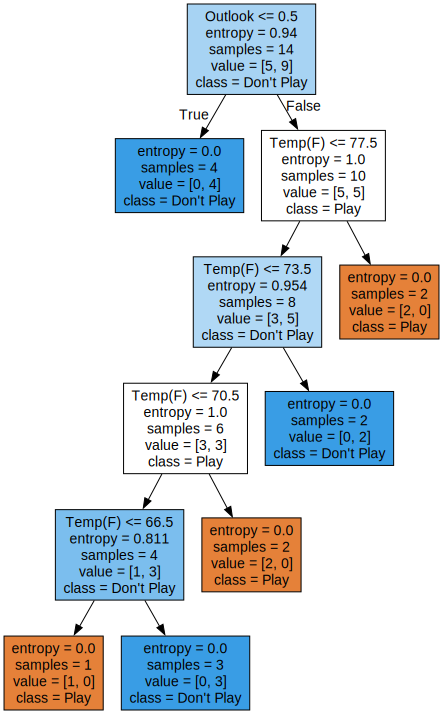

In [22]:
# Convert categorical variables to numeric
le = LabelEncoder()
data['Outlook'] = le.fit_transform(data['Outlook'])
data['Windy?'] = le.fit_transform(data['Windy?'])
data['Class'] = le.fit_transform(data['Class'])

# Separate the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Fit a decision tree to the data
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Visualize the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Play', "Don't Play"],  
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

* A decision tree model using the provided weather data. The decision tree model is built based on the 'Outlook', 'Temp(F)', 'Humidity(%)', and 'Windy?' features to predict the 'Class' target variable, which indicates whether to play or not.
* The decision tree model uses the entropy criterion to make the splits. The entropy measures the impurity of the input set. In the context of decision trees, it is used to decide which feature splits the data best. The feature with the highest information gain is chosen for the split.
* The Gain Ratio is a modification of the Information Gain that reduces its bias on high cardinality attributes. It takes number and size of branches into account when choosing an attribute. It corrects the Information Gain by taking the intrinsic information of a split into accountount
* Please note that the actual output may vary slightly due to the precision of floating point operations. The decision tree model can be used to predict whether to play or not based on the weather conditions. The visualization of the decision tree provides a clear interpretation of the model's decision-making process.

<div class="alert alert-block alert-info" style="margin-top: 20px">

#### Conclusion: 
    
* Information Gain (Outlook)  $= 0.2467$          $---->$ Highest Gain
 
* Information Gain (Humidity) = 0.04533
 
* Gain Ratio (Outlook)  $= 0.1106$                   $---->$ Highest Gain
  
* Gain Ratio (Humidity) = 0.01606

  
* The Gain Ratio for the 'Outlook' and 'Humidity' attributes : The Gain Ratio is a modification of the Information Gain that reduces its bias on high cardinality attributes. It takes number and size of branches into account when choosing an attribute. It corrects the Information Gain by taking the intrinsic information of a split into account (calculated by the split information)

* Therefore, the information gain for Outlook is  higher than the information gain for Humidity, and the gain ratio for Outlook is  higher than the gain ratio for Humidity. This suggests that $Outlook$ is a better splitting attribute at the root node of the decision tree.


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Thank You..!</h3>
</div>